In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ai_job_dataset.csv")

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.shape

(15000, 19)

In [5]:
# Check missing values
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [6]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [8]:
# change column type
df["posting_date"] = pd.to_datetime(df["posting_date"])
df["application_deadline"] = pd.to_datetime(df["application_deadline"])

In [9]:
# check duplicates
df.duplicated().sum()

np.int64(0)

## Which job roles offer the highest salary?

C:\Users\DELL\AppData\Local\Temp\ipykernel_19384\2170075930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="job_title", y="salary_usd", data=highest_paid_salary, palette="Set2")


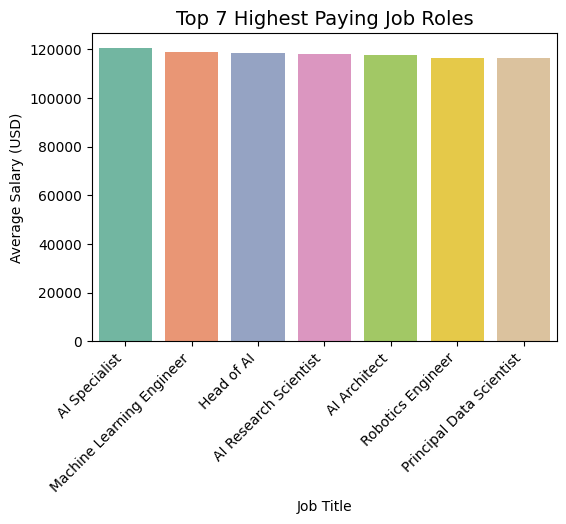

In [10]:
highest_paid_salary = df.groupby("job_title")["salary_usd"].mean().sort_values(ascending=False).reset_index().head(7)

plt.figure(figsize=(6,4))
sns.barplot(x="job_title", y="salary_usd", data=highest_paid_salary, palette="Set2")
plt.title("Top 7 Highest Paying Job Roles", fontsize=14)
plt.ylabel("Average Salary (USD)")
plt.xlabel("Job Title")
plt.xticks(rotation=45, ha='right')
plt.show()

## Does experience level really increase salary?

In [11]:
# change column values
df["experience_level"] = df["experience_level"].replace({"EN":"Entry level", "EX":"Executive", "MI":"Mid level", "SE":"Senior"})

C:\Users\DELL\AppData\Local\Temp\ipykernel_19384\2831604916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experience_level", y="salary_usd", data=experience_lev, palette="Set3")


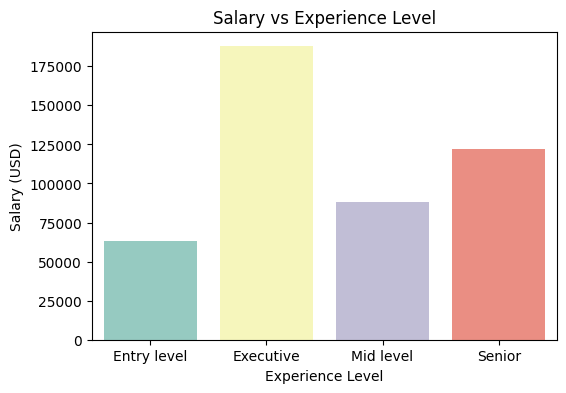

In [12]:
experience_lev = df.groupby("experience_level")["salary_usd"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x="experience_level", y="salary_usd", data=experience_lev, palette="Set3")
plt.title("Salary vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()

## Where are most remote jobs available?

C:\Users\DELL\AppData\Local\Temp\ipykernel_19384\3858582396.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="company_location", y="count", data=remote_job_counts.head(5), palette="Pastel1")


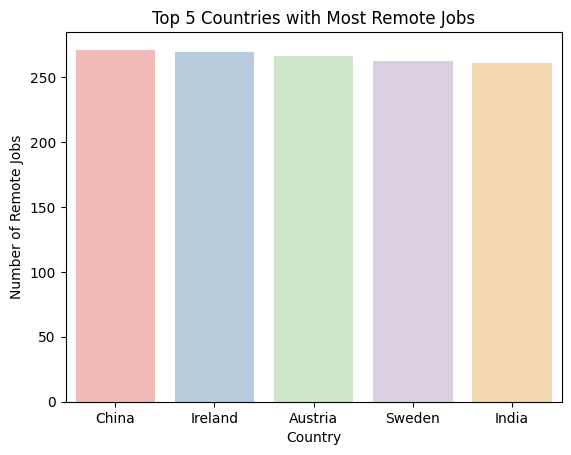

In [13]:
remote_jobs = df[df['remote_ratio'] == 100]
remote_job_counts = remote_jobs['company_location'].value_counts().reset_index()

sns.barplot(x="company_location", y="count", data=remote_job_counts.head(5), palette="Pastel1")
plt.title("Top 5 Countries with Most Remote Jobs")
plt.xlabel("Country")
plt.ylabel("Number of Remote Jobs")
plt.show()

##  Most in-demand skills for high-paying jobs?

C:\Users\DELL\AppData\Local\Temp\ipykernel_19384\1772277465.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=skill, x="salary_usd", y="Skills_list",palette="Set2")


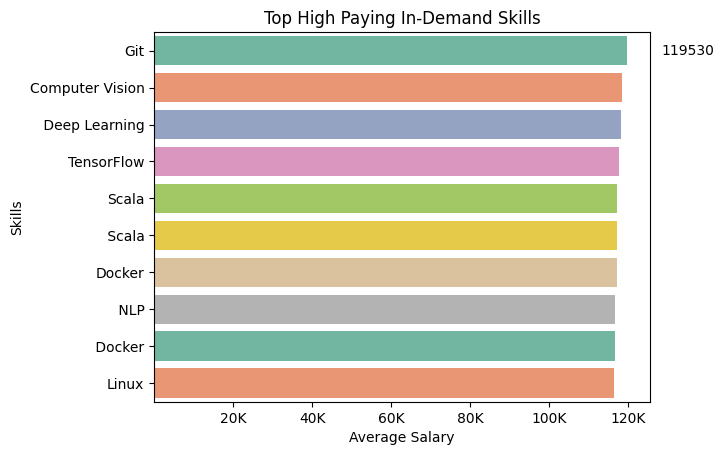

In [14]:
df['Skills_list'] = df['required_skills'].apply(lambda x: [skill for skill in x.split(",")])

#Split list values into separate rows
exploded_df = df.explode('Skills_list')

skill = exploded_df.groupby("Skills_list")["salary_usd"].mean().sort_values(ascending=False).reset_index().head(10)

ax = sns.barplot(data=skill, x="salary_usd", y="Skills_list",palette="Set2")
ax.bar_label(ax.containers[0], padding=25)

plt.xticks([20000,40000,60000,80000,100000,120000],["20K","40K","60K","80K","100K","120K"])
plt.xlabel('Average Salary')
plt.ylabel('Skills')
plt.title('Top High Paying In-Demand Skills')
plt.show()

## What is the average salary?

In [15]:
average_salary = df["salary_usd"].mean()
print(f"Average Salary (USD): ${average_salary:,.2f}")

Average Salary (USD): $115,348.97


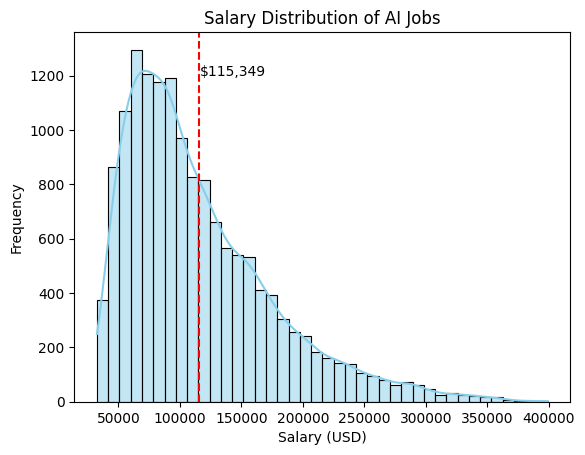

In [16]:
sns.histplot(df['salary_usd'], kde=True, color='skyblue', bins=40)
plt.axvline(average_salary, color='red', linestyle='--')
plt.title("Salary Distribution of AI Jobs")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.text(x=average_salary+1000, y=1200, s=f"${average_salary:,.0f}")
plt.show()

## Distribution of job types 

In [17]:
# change column values
temp = df["remote_ratio"].replace({50:"Hybrid",100:"Remote",0:"Office"})

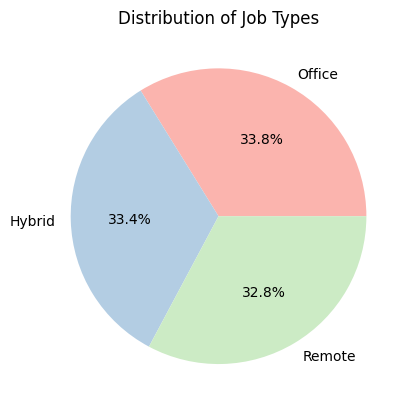

In [18]:
job_type_counts = temp.value_counts().reset_index()

plt.pie(job_type_counts["count"], labels=job_type_counts["remote_ratio"], autopct='%1.1f%%',colors=sns.color_palette("Pastel1"))
plt.title("Distribution of Job Types")
plt.show()

## How does salary vary by job title?

C:\Users\DELL\AppData\Local\Temp\ipykernel_19384\858803540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job_title', y='salary_usd',palette="Set3")


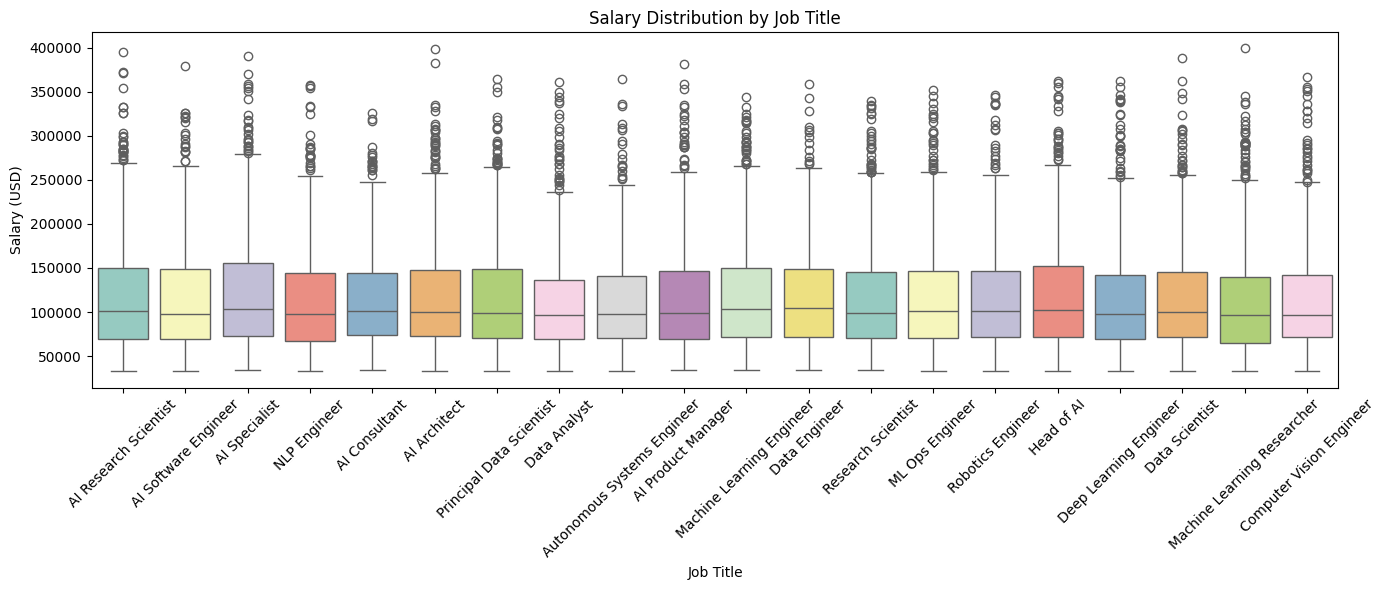

In [19]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='job_title', y='salary_usd',palette="Set3")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Job Title")
plt.ylabel("Salary (USD)")
plt.xlabel("Job Title")
plt.tight_layout()
plt.show()

## Which job titles in which countries have the highest average salaries?

In [20]:
grouped_df = df.groupby(["job_title","company_location"])["salary_usd"].mean().reset_index()

In [21]:
sorted_df = grouped_df.sort_values(by="salary_usd", ascending=False)

In [22]:
top_10 = sorted_df.head(10)

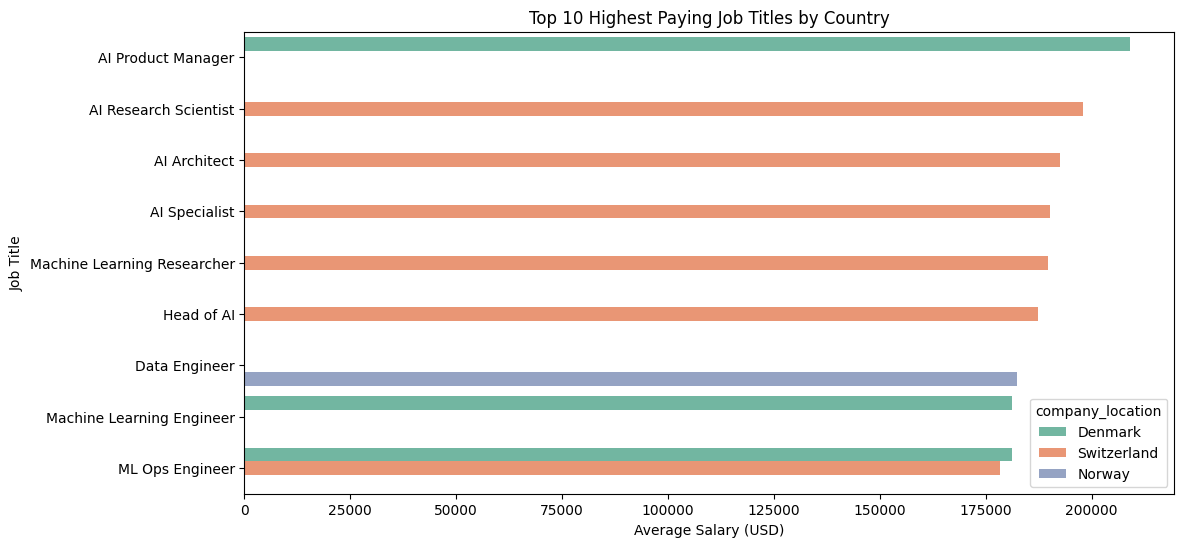

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x="salary_usd",y="job_title", hue="company_location",palette="Set2")
plt.title("Top 10 Highest Paying Job Titles by Country")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.show()

## How have AI job salaries changed over time?

In [24]:
df['posting_year_month'] = df['posting_date'].dt.to_period('M').astype(str)
monthly_salary = df.groupby('posting_year_month')['salary_usd'].mean().reset_index()

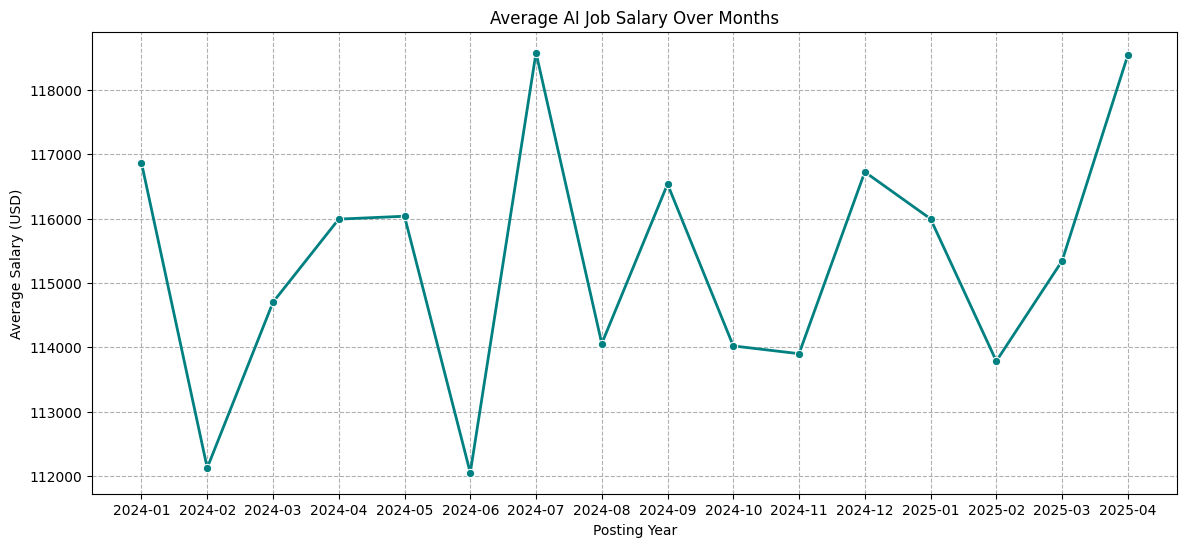

In [25]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='posting_year_month', y='salary_usd', data=monthly_salary, marker='o', linewidth=2, color="teal")
plt.title("Average AI Job Salary Over Months")
plt.xlabel("Posting Year")
plt.ylabel("Average Salary (USD)")
plt.grid(linestyle='--')
plt.show()

## Are job opportunities increasing or decreasing?

In [26]:
job_counts = df["posting_year_month"].value_counts().sort_index()

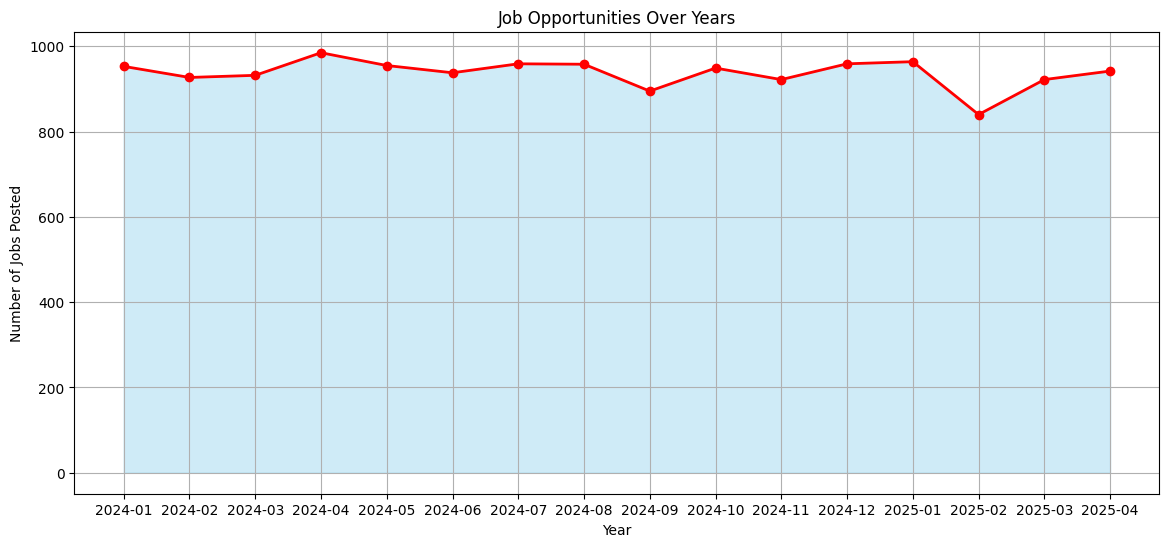

In [27]:
plt.figure(figsize=(14, 6))

plt.fill_between(job_counts.index, job_counts.values, color="skyblue", alpha=0.4)
plt.plot(job_counts.index, job_counts.values, color="red", linewidth=2, marker='o')

plt.title("Job Opportunities Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Jobs Posted")
plt.grid()
plt.show()

## What is the distribution of remote vs on-site jobs by Country?

In [28]:
# Replace column values
df["remote_ratio"] = df["remote_ratio"].replace({0:"Office",50:"Hybrid",100:"Remote"})

In [29]:
# Count of jobs grouped by country and remote type
remote_counts = df.groupby(["company_location","remote_ratio"]).size().unstack()

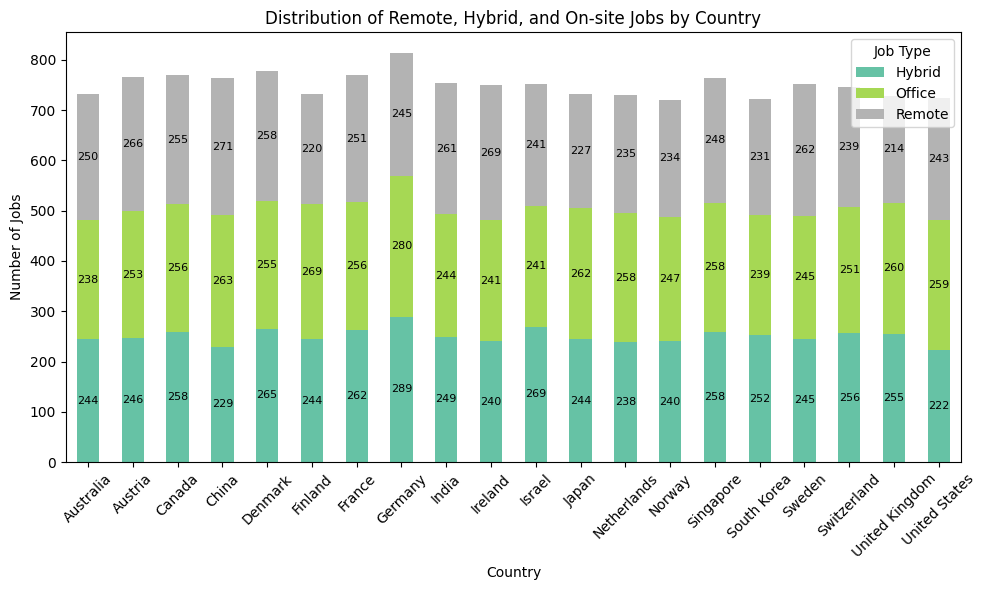

In [30]:
ax = remote_counts.plot(kind='bar',stacked=True, figsize=(10,6),colormap='Set2')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)
    
plt.title("Distribution of Remote, Hybrid, and On-site Jobs by Country")
plt.xlabel("Country")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.legend(title="Job Type", loc="upper right")
plt.tight_layout()
plt.show()

## Is there correlation between salary and experience?

In [31]:
# convert string values in numeric because .corr() not working with string
df['experience_num'] = df['experience_level'].map({'Entry level': 1,'Mid level': 2,'Senior': 3,'Executive': 4})
correlation = df[['experience_num', 'salary_usd']].corr()

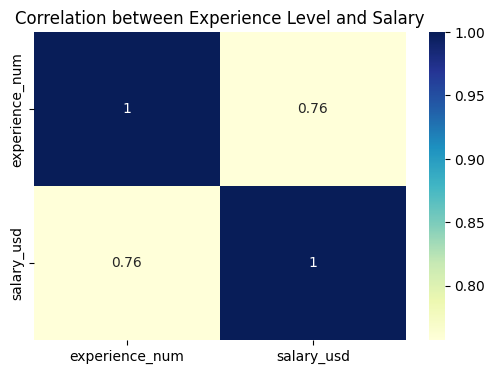

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
plt.title("Correlation between Experience Level and Salary")
plt.show()

##### As the experience level increases, the salary also increases — showing a strong positive correlation (0.72).